In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from random import randint
%matplotlib inline

In [39]:
data = pd.read_excel("ComprasClean2.xlsx", index_col=0)
data.drop(["mes_Orden", "dia_Orden", "ano_Orden", "Compra_Precio_Unitario", "Cod_Producto", "id_Proveedor", "id_Sucursal", "Cod_Bodega", "Cod_Unidad_Negocio", "Linea_a_Tiempo", "Linea_Completa", "Conteo_Linea_Compra", "Recepcion_Max_Fecha_Real"], axis = "columns", inplace = True)
data["Lead_Time_Desfase"] = data["Lead_Time_Real_Max_Compra"] - data["Lead_Time_Teorico_Compra"]




In [41]:
data2 = data.copy()
data2.drop(["Compra_Cantidad", "Lead_Time_Teorico_Compra", "Lead_Time_Real_Max_Compra"], axis = "columns", inplace = True)
data2["Compra_Pesos"] = data2["Compra_Pesos"] * 0.001
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8195 entries, 0 to 9082
Data columns (total 2 columns):
Compra_Pesos         8195 non-null float64
Lead_Time_Desfase    8195 non-null int64
dtypes: float64(1), int64(1)
memory usage: 192.1 KB


,Compra_Pesos,Lead_Time_Desfase
0,405.072,24
1,770.160,1
2,1417.752,6
3,555.000,6
4,1687.800,31


In [42]:
data.drop(["Compra_Pesos", "Lead_Time_Teorico_Compra", "Lead_Time_Real_Max_Compra"], axis = "columns", inplace = True)
#data2.drop(["Compra_Cantidad", "Lead_Time_Teorico_Compra", "Lead_Time_Real_Max_Compra"], axis = "columns", inplace = True)
data["Compra_Cantidad"] = data["Compra_Cantidad"] * 0.001
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8195 entries, 0 to 9082
Data columns (total 2 columns):
Compra_Cantidad      8195 non-null float64
Lead_Time_Desfase    8195 non-null int64
dtypes: float64(1), int64(1)
memory usage: 192.1 KB


,Compra_Cantidad,Lead_Time_Desfase
0,0.006,24
1,0.012,1
2,0.021,6
3,0.006,6
4,0.025,31


In [43]:
def epsilon(data):
    # The optimal value for epsilon will be found at the point of maximum curvature
    neigh = NearestNeighbors(n_neighbors = 2)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.figure(figsize=(15, 8))
    plt.plot(distances)
    
def metricas(data, labels):
    s = metrics.silhouette_score(data, labels, metric='euclidean')
    print('silhouette_score: ', s)

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: ', n_clusters_)
    print('Estimated number of noise points: ', n_noise_)
    return n_clusters_

def grafica_clusters(data, labels, n_clusters_):
    X = np.array(data)
    colors = []
    for i in range(n_clusters_):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
        colors.append('#D3D3D3')
    vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
    plt.figure(figsize=(15, 8))
    plt.scatter(X[:,0], X[:,1], c = vectorizer(labels), s=1)

In [44]:
data.describe()

,Compra_Cantidad,Lead_Time_Desfase
count,8195.000000,8195.000000
mean,1.218257,3.916901
std,5.295085,11.204723
min,0.001000,-23.000000
25%,0.009000,-2.000000
50%,0.040000,3.000000
75%,0.250000,8.000000
max,100.000000,77.000000


In [45]:
data2.describe()

,Compra_Pesos,Lead_Time_Desfase
count,8195.000000,8195.000000
mean,8541.901276,3.916901
std,18851.995065,11.204723
min,9.259000,-23.000000
25%,957.000000,-2.000000
50%,2984.688000,3.000000
75%,8329.460000,8.000000
max,356400.000000,77.000000


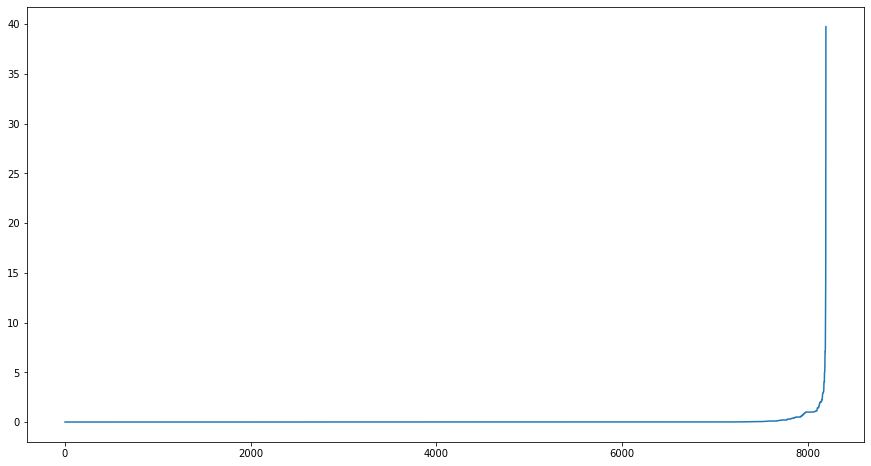

In [213]:
epsilon(data)

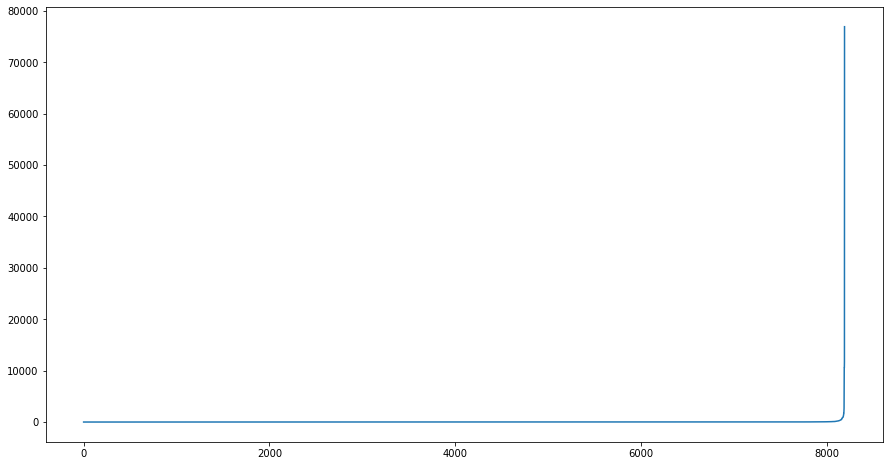

In [46]:
epsilon(data2)

silhouette_score:  0.4748650394617072
Estimated number of clusters:  2
Estimated number of noise points:  269


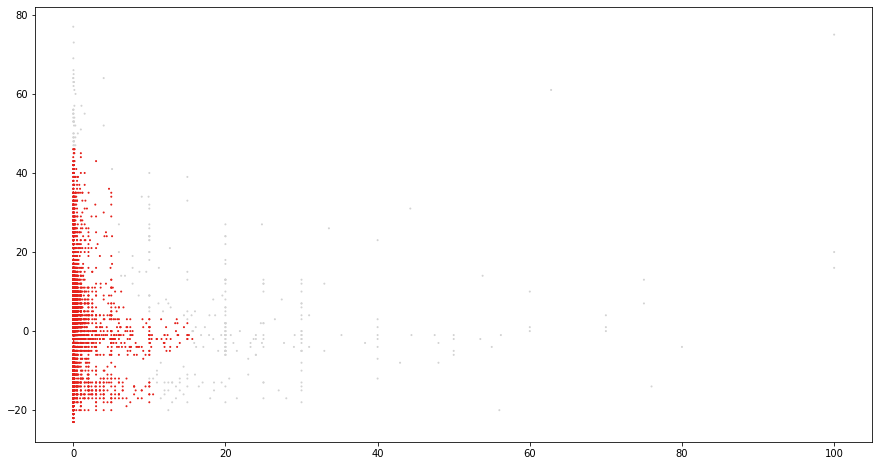

In [53]:
clustering = DBSCAN(eps = 3, min_samples = 30)
clustering.fit(data)
labels = clustering.labels_
n_clusters = metricas(data, labels)
grafica_clusters(data, labels, n_clusters)

silhouette_score:  0.2595833134312846
Estimated number of clusters:  2
Estimated number of noise points:  546


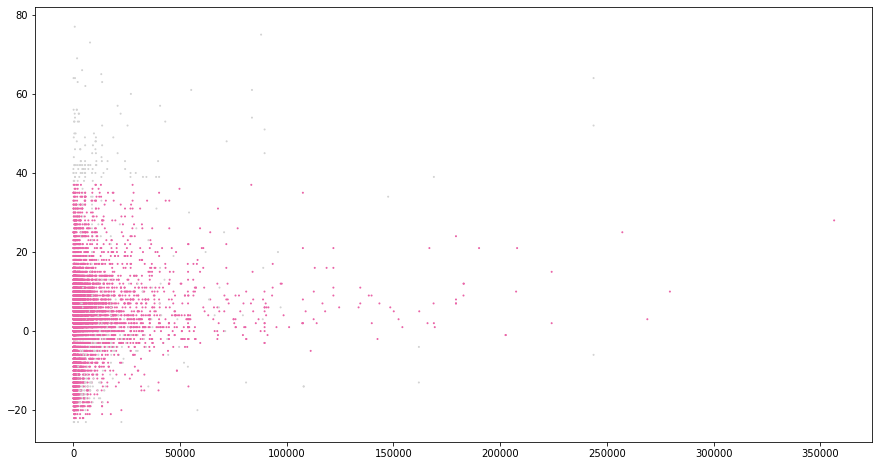

In [52]:
clustering2 = DBSCAN(eps = 100, min_samples = 30)
clustering2.fit(data2)
labels2 = clustering.labels_
n_clusters2 = metricas(data2, labels2)
grafica_clusters(data2, labels2, n_clusters2)

In [154]:
n_clusters = metricas(data, labels)

silhouette_score:  0.03386048712708106
Estimated number of clusters:  12
Estimated number of noise points:  415


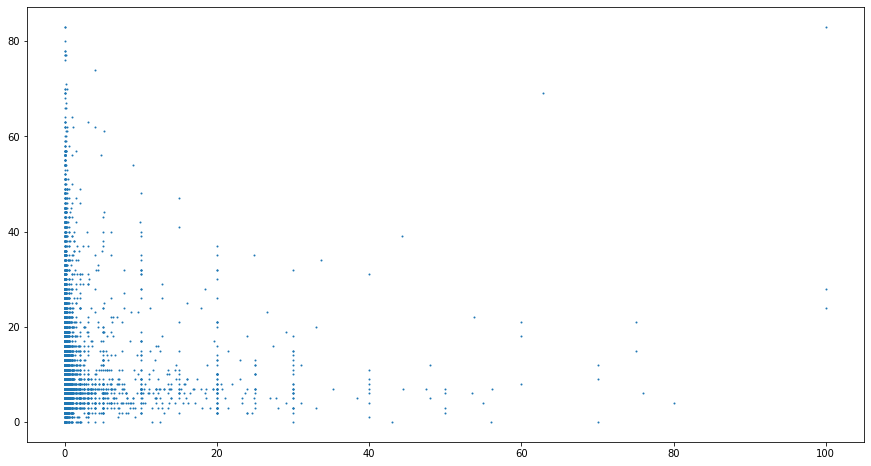

In [205]:
X = np.array(data)
plt.figure(figsize=(15, 8))
plt.scatter(X[:,0], X[:,1], s = 1)

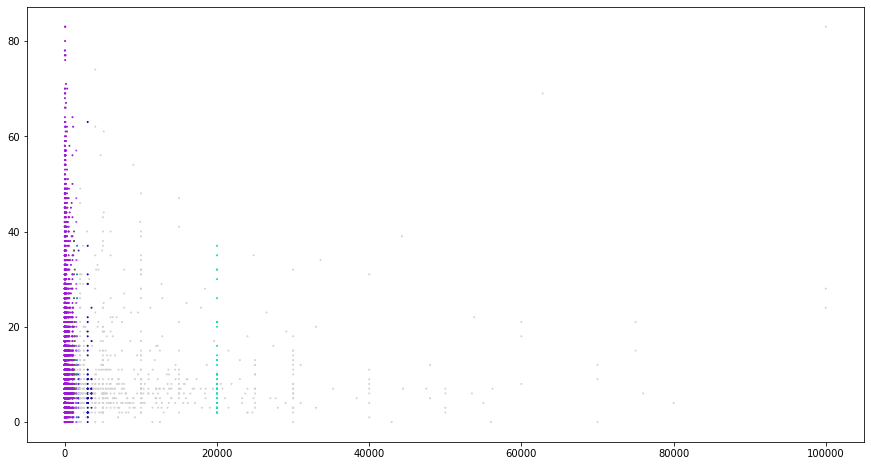

In [194]:
grafica_clusters(data, labels, n_clusters)